<a href="https://colab.research.google.com/github/jh941213/NLP/blob/main/%E1%84%80%E1%85%A1%E1%86%B7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2(%E1%84%89%E1%85%AE%E1%84%8B%E1%85%A5%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf 

In [ ]:
train_sen = [    
    "재미있다!!!!", 
    "추천! 꼭 다시 보고 싶은 영화",
    "별로다ㅜㅜakdfj1259", 
    "노잼"]

In [ ]:
train_y = np.array([1, 1, 0, 0])

In [ ]:
# cleaning
import re 

temp = []
for sen in train_sen :  
    sen = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", sen)
    temp.append(sen)

temp

['재미있다', '추천 꼭 다시 보고 싶은 영화', '별로다ㅜㅜ', '노잼']

In [ ]:
!pip install konlpy

In [ ]:
# 토큰화 
from konlpy.tag import Okt 
okt = Okt()

clean_x = []
for sen in temp : 
    clean_x.append(okt.morphs(sen, stem = True))

clean_x

[['재미있다'], ['추천', '꼭', '다시', '보고', '싶다', '영화'], ['별로', '다', 'ㅜㅜ'], ['노잼']]

In [ ]:
# 토큰 -> 숫자 
from tensorflow.keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_x)

In [ ]:
tokenizer.word_index

In [ ]:
word_encoding = tokenizer.texts_to_sequences(clean_x)
word_encoding

[[1], [2, 3, 4, 5, 6, 7], [8, 9, 10], [11]]

In [ ]:
# 문장 길이 맞춰주기 -> padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

MAX_LENGTH = 10 

padded = pad_sequences(word_encoding, maxlen = MAX_LENGTH, padding = 'post')
padded

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  4,  5,  6,  7,  0,  0,  0,  0],
       [ 8,  9, 10,  0,  0,  0,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

TEST DATA

In [ ]:
test_sen = [    
    "별로", "재미있는 영화", "추천 꿀잼"]

test_y = [0, 1, 1]

In [ ]:
clean_test = []
for sen in test_sen :  
    sen = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", "", sen)
    clean_test.append(okt.morphs(sen, stem = True))

clean_test

[['별로'], ['재미있다', '영화'], ['추천', '꿀잼']]

In [ ]:
word_encoding_test = tokenizer.texts_to_sequences(clean_test)
word_encoding_test

[[8], [1, 7], [2]]

In [ ]:
MAX_LENGTH = 10 

padded_test = pad_sequences(word_encoding_test, maxlen = MAX_LENGTH, padding = 'post')
padded_test

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

### 모델링

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 # 패딩까지 추가
vocab_size

12

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding 

model = Sequential()
model.add(Embedding(vocab_size, 3))
model.add(LSTM(3))
model.add(Dense(1))
# model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 3)           36        
                                                                 
 lstm_4 (LSTM)               (None, 3)                 84        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


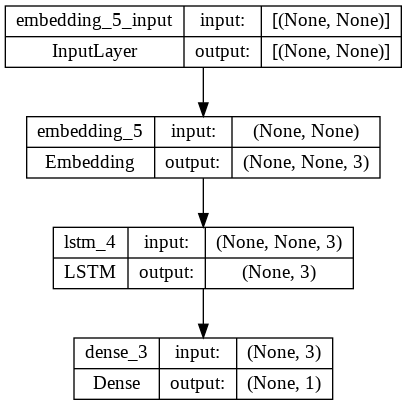

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes = True)

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True ),
    # loss = tf.keras.losses.BinaryCrossentropy(from_logits = False ),
    metrics = ['acc']
)

In [ ]:
padded, train_y

In [ ]:
model.fit(padded, train_y, epochs = 300)

In [ ]:
model.evaluate(padded_test, np.array(test_y))

1/1 [==============================] - 1s 570ms/step - loss: 0.1492 - acc: 1.0000


[0.14924149215221405, 1.0]

In [ ]:
# model.predict(padded_test)

In [ ]:
import tensorflow as tf 
tf.keras.activations.sigmoid(model.predict(padded_test))

1/1 [==============================] - 0s 19ms/step


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.15367629],
       [0.87859005],
       [0.85947436]], dtype=float32)>